# 2023 트렌드

In [1]:
import pandas as pd
import numpy as np
from kiwipiepy import Kiwi
import copy
import re
from kiwipiepy.utils import Stopwords
import nltk

from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
%matplotlib inline
import konlpy

C:\Users\cutad\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('../data_trend/2023년 트렌드.csv', encoding='utf-8')

# postdate, body, description, title 칼럼만 사용 
df = df[['postdate', 'body', 'description', 'title']]
df.head()

,postdate,body,description,title
0,20240517,주얼리 온라인 산업의 트렌드 비교 분석을 할려고 합니다. 일반적인 그래프로 되어 있...,이와 같은 <b>트렌드<\/b>와 데이터를 통해 <b>2023년<\/b>과 2024...,2023년과 2024년 주얼리 온라인 산업의 트렌드 비교 분석
1,20221009,지난 9월에 나와 2023년을 4개월이나 앞두고 (원고 작성 시점으로 하면 최소 반...,내가 생각하는 <b>2023년 트렌드<\/b>는 다른 해 대비해서 유독 2022년에...,트렌드 코리아 선정 2023년 10대 소비트렌드라고?
2,20231229,구글이 창립 25주년을 기념하는 방식 사진 출처: about.google 2023년...,com 구글 <b>트렌드<\/b> 타임 캡슐은 현재 사람들에게 사랑받고 있는 200...,구글이 알려주는 2023년 트렌드
3,20230726,2023년 트렌드로 떠오른 즉석양념을 최초로 도입한 이천 고기집 육탐미 찐 방문기 ...,<b>2023년 트렌드<\/b>로 떠오른 즉석양념을 최초로 도입한 이천 고기집 육탐...,2023년 트렌드로 떠오른 즉석양념을 최초로 도입한 이천 고기집 육탐미 찐 방문기
4,20231227,트렌드미 2023 2023년도 나에게 큰 화두는 무엇이었을까? 한번 돌아보게 되는 ...,<b>트렌드<\/b>미 2023 <b>2023년<\/b>도 나에게 큰 화두는 무엇이...,2023년 트렌드 미


## 1. 전처리

In [3]:
# 전처리할 칼럼들
columns = ['body', 'description', 'title']

# 중복 제거
df.drop_duplicates(subset=columns, inplace=True)

for column in columns:
    # 정규표현식 - 한글, 숫자, 영어 및 공백 이외의 문자 제거
    df[column] = df[column].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z ]", "", regex=True)
    # 앞뒤 공백 제거
    df[column] = df[column].str.strip()
    # 여러 개의 공백을 하나의 공백으로 변경
    df[column] = df[column].str.replace(' +', " ", regex=True)

# 공백만 있는 칼럼을 NaN으로 변경 후 제거
df[columns] = df[columns].replace('', np.nan)
df.dropna(subset=columns, how='any', inplace=True)

In [4]:
from kiwipiepy import Kiwi

# Kiwi 초기화
kiwi = Kiwi()

# 불용어 리스트 정의 및 파일 로드
additional_stopwords = ['트렌드', '본문', '다양', '출처', '활용', '표현', '대하', '선택', '완성',
                        '오늘', '유행', '올해', '가지', '안녕하세요', '소개', '전망', '시즌', '세계', '추천', 
                        '최신', '역할', '기업', '산업', '주목', '시작', '중요', '편안', '요소', '개발', 
                        '사용', '제공', '강조', '제품', '부동산', '수요', '증가', '관심', '기술', '규모', 
                        '가능', '사업', '느낌', '필요', '인공', '블랙', '소비자', '서비스', '관련', '지능', 
                        '생각', '색상', '모습', '전략', '경우', '시대', '때문', '주요', '정보', '사람', '동시', 
                        '기반', '핵심', '사이즈', '상품', '이후', '가격', '분야', '의미', '출시', '대비', '계획', 
                        '도움', '분석', '강화', '지역', '키워드', '시도', '중심', '공간', '발표', '기회', '진행', 
                        '구성', '방법', '업계', '판매', '세대', '이야기', '고려', '기대', '확대', '사회', '생활', 
                        '예상', '고객', '전문', '포함', '등장', '최근', '활동', '가구', '확인', '여름', '운영', 
                        '반영', '선호', '기준', '특징', '보이', '관리', '전문가', '결과', '사진', '효과', '내용', 
                        '자료', '미래', '경기', '적용', '비즈니스', '자리', '상황', '전체', '혁신', '정도', '목표', 
                        '이유', '매출', '영향', '지원', '회사', '유지', '경험', '기존', '과정', '예측', '가방', 
                        '가치', '노력', '효율', '생산', '변화', '소비', '플랫폼', '아이템', '마케팅', '성장', '소재', 
                        '관계', '방식', '기능', '데이터', '평균', '이용', '패턴', '사용자', '준비', '발전', 
                        '인하', '창업', '사랑', '대표', '네이버', '가을', '부분', '이미지', '문제', '대응', 
                        '미디어', '제작', '오피스', '형태', '현상', '현실', '시스템', '조사', '업무', '알파', 
                        '여성', '가상', '국내', '현대', '보호', '팬츠', '조직', '마음', '요즘', '머리', '조합', 
                        '선정', '연결', '고급', '모델', '정리', '도서', '공유', '비용', '검색', '최고', '특별', 
                        '코디', '실종', '성공', '추구', '완벽', '영상', '인간', '과거', '방문', '확장', '집중', 
                        '인식', '그래픽', '저작', '사이', '장식', '파악', '설명', '일반','감사', '자체', '후기', 
                        '대상', '기록', '인덱스', '추가', '매장', '이해', '개선', '필수', '블로그', '세상', '겨울', '고민', '생성'
                        ]

# 불용어 텍스트 파일에서 불용어 읽기
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_list = file.read().splitlines()
    return stopwords_list

# 파일에서 불용어 목록 로드
stopwords_file_path = '../stopwords.txt'
file_stopwords = load_stopwords(stopwords_file_path)

# 불용어 리스트 결합
all_stopwords = set(additional_stopwords + file_stopwords)

In [5]:
# 불용어 제거 함수 정의
def remove_stopwords(text, stopwords):
    tokens = kiwi.tokenize(text)
    filtered_tokens = [token.form for token in tokens if token.form not in stopwords]
    return ' '.join(filtered_tokens)

# 전처리 함수 정의
def preprocess_korean(text, analyzer=kiwi, stopwords=all_stopwords):
    my_text = copy.copy(text)
    my_text = my_text.replace('\n', ' ') # (1) 줄바꿈 문자 제거
    my_text = analyzer.space(my_text) # (2) 띄어쓰기 교정
    sents = analyzer.split_into_sents(my_text) # (3) 문장 토큰화
    p = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
    all_result = []
    for sent in sents:
        token_result = remove_stopwords(sent.text, stopwords) # (4) 형태소 분석 및 불용어 제거
        token_result = p.sub(' ', token_result) # (5) 특수 문자 제거 (=한글을 제외한 문자 제거)
        all_result.append(token_result) # (6) 형태소 분석한 결과를 다시 join
    
    all_result = ' '.join(all_result) # (7) 모든 문장을 하나의 string으로 join

    return all_result

# 품사(명사, 동사, 형용사, 부사) 추출 함수 정의
def wordclass_korean(my_str, kiwi=kiwi):
    result = []
    tokens = kiwi.tokenize(my_str, normalize_coda=True)
    for token in tokens:
        if token.tag in ['NNG', 'NNP', 'NNB']:  # 명사 태그만 추출
            result.append(token.form)
    result = ' '.join(result)
    return result

In [6]:
%%time
# 전처리 함수 적용
for column in columns:
    preprocessed_column = 'preprocessed_' + column 
    df[preprocessed_column] = df[column].apply(lambda x: preprocess_korean(x))

# 품사 추출 함수 적용
preprocessed_columns = ['preprocessed_body', 'preprocessed_title', 'preprocessed_description']
for column in preprocessed_columns:
    df[column] = df[column].apply(wordclass_korean)

df.head()

CPU times: total: 1min 35s
Wall time: 2min 58s


,postdate,body,description,title,preprocessed_body,preprocessed_description,preprocessed_title
0,20240517,주얼리 온라인 산업의 트렌드 비교 분석을 할려고 합니다 일반적인 그래프로 되어 있는...,이와 같은 b트렌드b와 데이터를 통해 b2023년b과 2024년 주얼리 온라인 산업...,2023년과 2024년 주얼리 온라인 산업의 트렌드 비교 분석,주얼리 온라인 비교 적 그래프 은 행동 시장 참고 사항 반 시점 번 점검 것 주얼리...,통 주얼리 온라인 수 요인 수,주얼리 온라인 비교
1,20221009,지난 9월에 나와 2023년을 4개월이나 앞두고 원고 작성 시점으로 하면 최소 반년...,내가 생각하는 b2023년 트렌드b는 다른 해 대비해서 유독 2022년에서 이어지는...,트렌드 코리아 선정 2023년 10대 소비트렌드라고,개월 원고 작성 시점 면 최소 반년 코리아 대 빅뱅 체리슈머 뉴디멘드 디깅 모멘텀 ...,해 연장선 링크 참조,코리아 대
2,20231229,구글이 창립 25주년을 기념하는 방식 사진 출처 aboutgoogle 2023년이 ...,com 구글 b트렌드b 타임 캡슐은 현재 사람들에게 사랑받고 있는 2000년 대 레...,구글이 알려주는 2023년 트렌드,구글 창립 주년 기념 매체 기념 행사 이벤트 전 기 구글 도 기념 해 질문 영감 주...,구글 타임 캡슐 레트로 감성 수 화면 디자인 눈길 네온 사인 되 화면,구글 알리 주
3,20230726,2023년 트렌드로 떠오른 즉석양념을 최초로 도입한 이천 고기집 육탐미 찐 방문기 ...,b2023년 트렌드b로 떠오른 즉석양념을 최초로 도입한 이천 고기집 육탐미 찐 방문...,2023년 트렌드로 떠오른 즉석양념을 최초로 도입한 이천 고기집 육탐미 찐 방문기,즉석 양념 최초 도입 천 고기집 육탐미 방문기 고기집 육탐 미 증포동 위치 즉석 양...,즉석 양념 최초 도입 천 고기집 육탐미 방문기 고기집 육탐 미 증포동 위치 즉석 양...,즉석 양념 최초 도입 천 고기집 육탐미 방문기
4,20231227,트렌드미 2023 2023년도 나에게 큰 화두는 무엇이었을까 한번 돌아보게 되는 연...,b트렌드b미 2023 b2023년b도 나에게 큰 화두는 무엇이었을까 한번 돌아보게 ...,2023년 트렌드 미,미 화두 번 연말 코리아 화두 수 온라인 차별 온라인 시장 급속도 오프라인 온라인 ...,미 화두 번 연말 코리아 화두,미


In [20]:
# 전처리한 결과 csv로 저장 
df.to_csv('23트렌드_전처리.csv', index=False, encoding='utf-8-sig')

## 2. 단어 빈도 계산

In [7]:
# 단어 빈도 계산 및 상위 단어 추출 
def explode_and_count(df, column):
    exploded = df[column].str.split().explode()  # 문자열을 단어 단위로 나누어 행으로 펼침
    word_counts = exploded.value_counts().reset_index()  # 단어 빈도 계산
    word_counts.columns = ['word', 'count']  # 컬럼명 설정
    return word_counts

### [preprocessed_body]

In [8]:
# 각 칼럼에 대해 단어 빈도 계산
word_counts_list = []
for column in ['preprocessed_body']:
    word_counts = explode_and_count(df, column)
    word_counts_list.append(word_counts)

In [9]:
# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body = pd.concat(word_counts_list).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body = all_words_body[all_words_body['word'].str.len() > 1]

# 상위 30개 단어 출력
top_30_words = all_words_body.head(30)
top_30_words

,word,count
13473,컬러,3707
7741,스타일,1773
15869,헤어,1635
3142,디자인,1631
14665,패션,1410
8058,시장,1268
10805,인기,1187
15307,피부,978
5979,브랜드,892
16177,환경,859


In [10]:
l = []
for i in top_30_words['word']:
    l.append(i)
l

['컬러',
 '스타일',
 '헤어',
 '디자인',
 '패션',
 '시장',
 '인기',
 '피부',
 '브랜드',
 '환경',
 '연출',
 '디지털',
 '인테리어',
 '지속',
 '메이크업',
 '콘텐츠',
 '자연',
 '여행',
 '건강',
 '개인',
 '뷰티',
 '경제',
 '분위기',
 '투자',
 '매력',
 '구매',
 '온라인',
 '독특',
 '포인트',
 '코로나']

### [preprocessed_description]

In [11]:
# 각 칼럼에 대해 단어 빈도 계산
word_counts_list = []
for column in ['preprocessed_description']:
    word_counts = explode_and_count(df, column)
    word_counts_list.append(word_counts)

In [12]:
# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_description = pd.concat(word_counts_list).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_description = all_words_description[all_words_description['word'].str.len() > 1]

# 상위 30개 단어 출력
top_30_words = all_words_description.head(30)
top_30_words

,word,count
2576,컬러,392
2766,패션,225
2982,헤어,200
1162,뷰티,130
1503,스타일,117
598,디자인,93
2597,코리아,91
2084,인테리어,84
1557,시장,75
2059,인기,72


### [preprocessed_title]

In [13]:
# 각 칼럼에 대해 단어 빈도 계산
word_counts_list = []
for column in ['preprocessed_title']:
    word_counts = explode_and_count(df, column)
    word_counts_list.append(word_counts)

In [14]:
# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_title = pd.concat(word_counts_list).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_title = all_words_title[all_words_title['word'].str.len() > 1]

# 상위 30개 단어 출력
top_30_words = all_words_title.head(30)
top_30_words

,word,count
1127,컬러,157
1342,헤어,122
1236,패션,97
493,뷰티,71
1140,코리아,69
922,인테리어,48
251,디자인,45
658,스타일,43
903,이슈,27
360,메이크업,27


## 3. 워드 클라우드

참고 사이트: https://serendipity77.tistory.com/entry/영화동감-영화동감-댓글-리뷰-워드-클라우드wordcloud로-만들어보기파이썬-Python 

[엑셀 자동화로 칼퇴하는 김대리의 고군분투기:티스토리]

In [15]:
font_path='C:\\Windows\\Fonts\\malgun.ttf'

### [body WordCloud]

In [16]:
## 데이터 프레임을 딕셔너리 형태로 변환해야 함

dic_word = all_words_body.set_index('word').to_dict()['count']
dic_word

{'컬러': 3707,
 '스타일': 1773,
 '헤어': 1635,
 '디자인': 1631,
 '패션': 1410,
 '시장': 1268,
 '인기': 1187,
 '피부': 978,
 '브랜드': 892,
 '환경': 859,
 '연출': 854,
 '디지털': 812,
 '인테리어': 764,
 '지속': 744,
 '메이크업': 690,
 '콘텐츠': 681,
 '자연': 645,
 '여행': 633,
 '건강': 606,
 '개인': 597,
 '뷰티': 567,
 '경제': 564,
 '분위기': 540,
 '투자': 484,
 '매력': 468,
 '구매': 465,
 '온라인': 448,
 '독특': 441,
 '포인트': 439,
 '코로나': 429,
 '문화': 405,
 '코리아': 405,
 '광고': 391,
 '개성': 366,
 '스타일링': 344,
 '미국': 335,
 '중국': 334,
 '수익': 330,
 '일상': 313,
 '아트': 301,
 '게임': 293,
 '음악': 290,
 '한국': 288,
 '글로벌': 280,
 '교육': 273,
 '네일': 267,
 '염색': 260,
 '취향': 260,
 '맞춤': 240,
 '배송': 236,
 '식품': 235,
 '브라운': 226,
 '핑크': 219,
 '일본': 217,
 '레드': 217,
 '조화': 212,
 '적극': 210,
 '스마트': 209,
 '메타버스': 208,
 '모바일': 206,
 '빅뱅': 196,
 '디깅': 192,
 '트렌디': 192,
 '블루': 191,
 '음식': 190,
 '소셜': 188,
 '쇼핑': 187,
 '화장품': 184,
 '팬데믹': 180,
 '체리슈머': 179,
 '스킨케어': 178,
 '머리카락': 177,
 '자유': 177,
 '영화': 170,
 '신발': 165,
 '달러': 164,
 '프로그램': 164,
 '전환': 164,
 '거래': 163,
 '결합': 163,


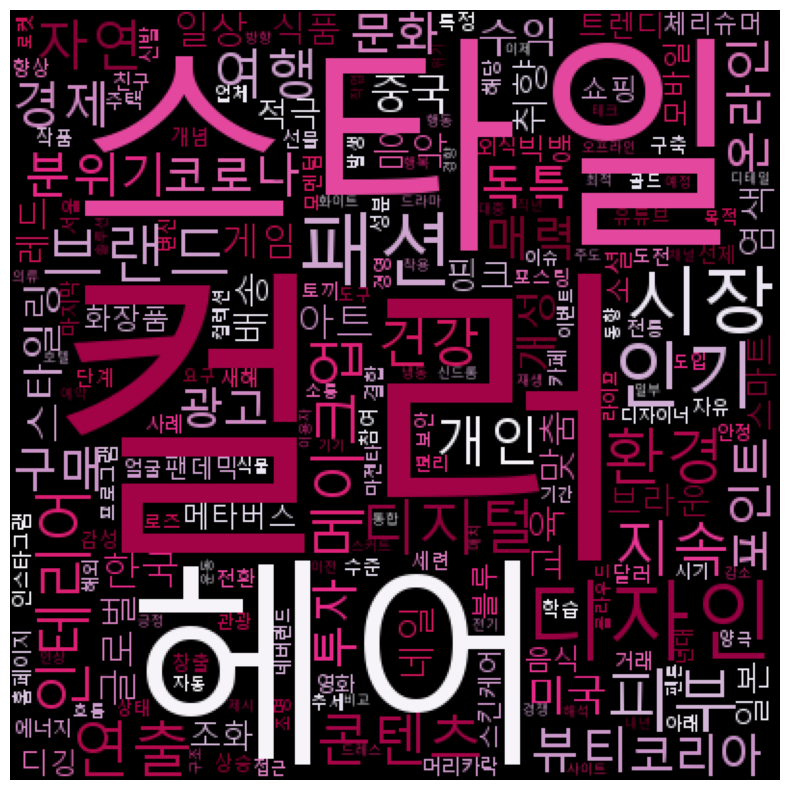

In [17]:
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'PuRd')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBr': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

## [description WordCloud]

In [18]:
## 데이터 프레임을 딕셔너리 형태로 변환해야 함

dic_word = all_words_description.set_index('word').to_dict()['count']
dic_word

{'컬러': 392,
 '패션': 225,
 '헤어': 200,
 '뷰티': 130,
 '스타일': 117,
 '디자인': 93,
 '코리아': 91,
 '인테리어': 84,
 '시장': 75,
 '인기': 72,
 '메이크업': 62,
 '경제': 51,
 '지속': 51,
 '포스팅': 37,
 '자연': 35,
 '피부': 33,
 '건강': 32,
 '디지털': 30,
 '팬톤': 29,
 '브랜드': 29,
 '스타일링': 29,
 '연출': 28,
 '여행': 28,
 '개성': 28,
 '환경': 27,
 '토끼': 25,
 '코로나': 25,
 '개인': 23,
 '콘텐츠': 23,
 '머니': 22,
 '일본': 22,
 '독특': 22,
 '제시': 22,
 '글로벌': 22,
 '알리': 21,
 '매력': 21,
 '아트': 21,
 '새해': 21,
 '중국': 21,
 '진화': 20,
 '비바': 20,
 '일상': 20,
 '쿨톤': 20,
 '맞이': 19,
 '리포트': 19,
 '스킨케어': 19,
 '김난도': 19,
 '네일': 19,
 '브라운': 18,
 '한국': 18,
 '이슈': 18,
 '교수': 17,
 '마젠타': 17,
 '포인트': 17,
 '상위': 17,
 '판매량': 17,
 '외식': 16,
 '교육': 16,
 '내년': 16,
 '염색': 16,
 '센터': 16,
 '미국': 16,
 '빅뱅': 16,
 '주도': 16,
 '로즈': 16,
 '공개': 15,
 '투자': 15,
 '페어': 15,
 '아래': 15,
 '블로거': 15,
 '문화': 15,
 '신발': 15,
 '광고': 15,
 '공예': 15,
 '뉴스': 14,
 '분기': 14,
 '변신': 14,
 '온라인': 14,
 '점프': 14,
 '가성비': 14,
 '작년': 14,
 '상반기': 13,
 '팬데믹': 13,
 '네온': 13,
 '올드': 13,
 '보고서': 13,
 '케라틴': 13,
 '연말': 1

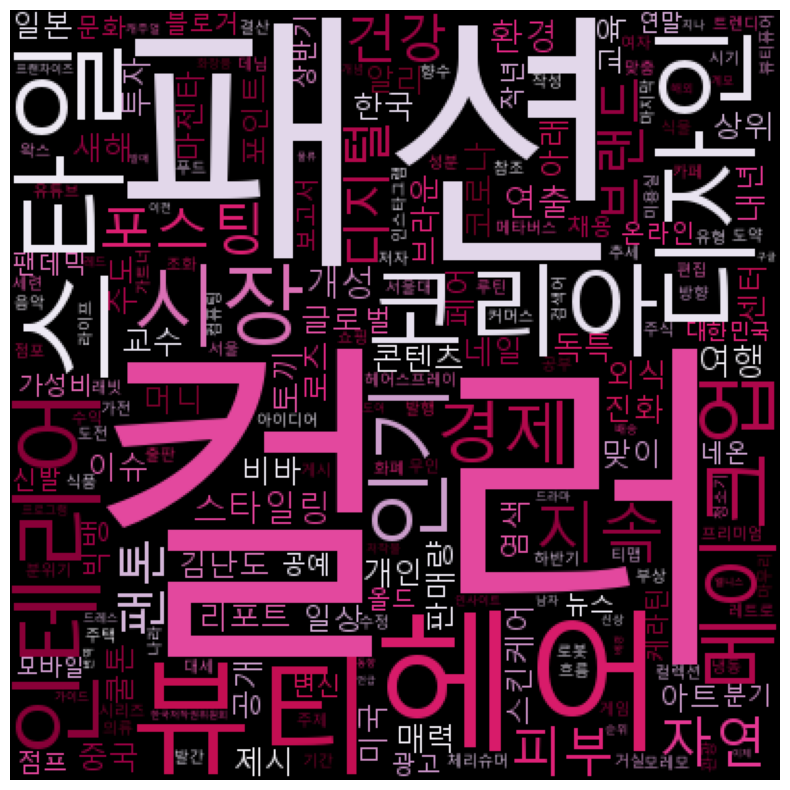

In [19]:
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'PuRd')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

## [title WordCloud]

In [20]:
## 데이터 프레임을 딕셔너리 형태로 변환해야 함

dic_word = all_words_title.set_index('word').to_dict()['count']
dic_word

{'컬러': 157,
 '헤어': 122,
 '패션': 97,
 '뷰티': 71,
 '코리아': 69,
 '인테리어': 48,
 '디자인': 45,
 '스타일': 43,
 '이슈': 27,
 '메이크업': 27,
 '시장': 26,
 '스타일링': 23,
 '인기': 22,
 '경제': 20,
 '전경련': 19,
 '대한민국': 17,
 '계묘': 17,
 '외식': 15,
 '염색': 15,
 '브랜드': 14,
 '리뷰': 14,
 '글로벌': 14,
 '여행': 14,
 '매력': 13,
 '네일': 13,
 '디지털': 13,
 '일본': 13,
 '건강': 12,
 '머니': 12,
 '결산': 12,
 '뉴스': 12,
 '미용실': 11,
 '변신': 11,
 '피부': 11,
 '아트': 11,
 '한국': 10,
 '리포트': 10,
 '아이디어': 10,
 '중국': 10,
 '팬톤': 10,
 '경영자': 9,
 '주도': 9,
 '왁스': 9,
 '페어': 9,
 '관광': 9,
 '토끼': 9,
 '마젠타': 9,
 '동향': 9,
 '케라틴': 9,
 '화장품': 9,
 '여자': 9,
 '스킨케어': 8,
 '푸드': 8,
 '공예': 8,
 '비바': 8,
 '새해': 8,
 '점프': 8,
 '하반기': 8,
 '커머스': 7,
 '브라운': 7,
 '뷰티퓨어': 7,
 '구글': 7,
 '가이드': 7,
 '콘텐츠': 7,
 '모바일': 7,
 '단발': 7,
 '네온': 7,
 '온라인': 7,
 '신발': 7,
 '로즈': 7,
 '래빗': 6,
 '패디': 6,
 '투자': 6,
 '티맵': 6,
 '미국': 6,
 '명품': 6,
 '모레모': 6,
 '문화': 6,
 '카페': 6,
 '대세': 6,
 '상반기': 6,
 '흐름': 6,
 '소다': 6,
 '교육': 6,
 '선물': 6,
 '알리': 6,
 '헤어스프레이': 6,
 '순위': 6,
 '음악': 6,
 '슈즈': 6,
 '유튜브': 6,
 '연출': 

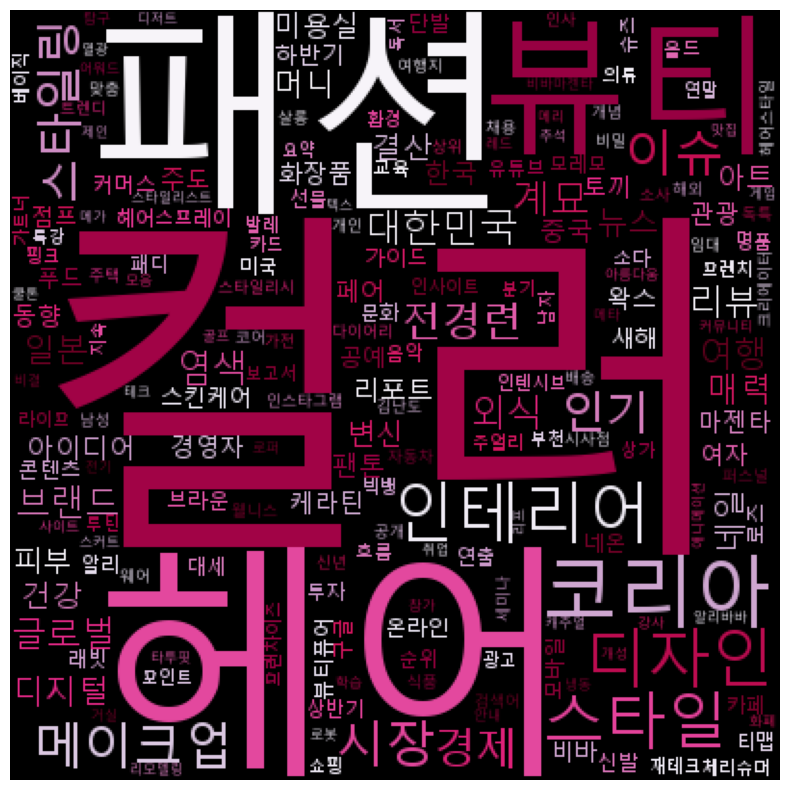

In [21]:
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'PuRd')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기